# W12 - Exercise

use the dataset __healthcare_dataset__ for this exercise

Column details: <br>
- **Name**: This column represents the name of the patient associated with the healthcare record. <br>
- **Age**: The age of the patient at the time of admission, expressed in years. <br>
- **Gender**: Indicates the gender of the patient, either "Male" or "Female."<br>
- **Blood** Type: The patient's blood type, which can be one of the common blood types (e.g., "A+", "O-", etc.).<br>
- **Medical** Condition: This column specifies the primary medical condition or diagnosis associated with the patient, such as "Diabetes," "Hypertension," "Asthma," and more.<br>
- **Date of Admission**: The date on which the patient was admitted to the healthcare facility.<br>
- **Doctor**: The name of the doctor responsible for the patient's care during their admission.<br>
- **Hospital**: Identifies the healthcare facility or hospital where the patient was admitted.<br>
- **Insurance Provider**: This column indicates the patient's insurance provider, which can be one of several options, including "Aetna," "Blue Cross," "Cigna," "UnitedHealthcare," and "Medicare."<br>
- **Billing Amount**: The amount of money billed for the patient's healthcare services during their admission. This is expressed as a floating-point number.<br>
- **Room Number**: The room number where the patient was accommodated during their admission.<br>
- **Admission Type**: Specifies the type of admission, which can be "Emergency," "Elective," or "Urgent," reflecting the circumstances of the admission.<br>
- **Discharge Date**: The date on which the patient was discharged from the healthcare facility, based on the admission date and a random number of days within a realistic range.<br>
- **Medication**: Identifies a medication prescribed or administered to the patient during their admission. Examples include "Aspirin," "Ibuprofen," "Penicillin," "Paracetamol," and "Lipitor."<br>
- **Test Results**: Describes the results of a medical test conducted during the patient's admission. Possible values include "Normal," "Abnormal," or "Inconclusive," indicating the outcome of the test.<br>

This exercise is applicable to multiple machine learning algorithms. Create EDA to visualize data and results and explore as far as you can.
Task:
1. Data Cleaning, Transformation
2. Visualization (EDA)
3. Use at least one machine learning techniques (Regression, Classification, Clustering)
4. Use different modelling algorithm to compare results (XGBoost, KNN, Hierarchical, Apriori, Linear, Logistic, etc)

This exercise is to test your willingness to explore, critical thinking and the knowledge when to use what algorithms to achieve a purpose. 

In [2]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

In [3]:
import urllib.request
import ssl

# Disable SSL verification
ssl._create_default_https_context = ssl._create_unverified_context


<h1>Data Cleaning and Transformation</h1>

In [4]:
# Load the dataset
url = "https://raw.githubusercontent.com/Trsh16/heathcare/main/healthcare_dataset.csv"
df = pd.read_csv(url)
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


In [5]:
# Check for missing values
df.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [6]:
# Convert categorical variables to numerical using Label Encoding
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Blood Type'] = le.fit_transform(df['Blood Type'])
df['Medical Condition'] = le.fit_transform(df['Medical Condition'])
df['Doctor'] = le.fit_transform(df['Doctor'])
df['Hospital'] = le.fit_transform(df['Hospital'])
df['Insurance Provider'] = le.fit_transform(df['Insurance Provider'])
df['Admission Type'] = le.fit_transform(df['Admission Type'])
df['Medication'] = le.fit_transform(df['Medication'])
df['Test Results'] = le.fit_transform(df['Test Results'])

In [7]:
# Convert Date columns to datetime
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

In [8]:
# Feature engineering: Create a new feature for the length of stay
df['Length of Stay'] = (df['Discharge Date'] - df['Date of Admission']).dt.days

In [9]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Length of Stay
0,Tiffany Ramirez,81,0,7,3,2022-11-17,7167,7960,3,37490.983364,146,0,2022-12-01,0,1,14
1,Ruben Burns,35,1,6,1,2023-06-01,2597,978,4,47304.064845,404,1,2023-06-15,2,2,14
2,Chad Byrd,61,1,5,5,2019-01-09,7180,7996,3,36874.896997,292,1,2019-02-08,2,2,30
3,Antonio Frederick,49,1,5,1,2020-05-02,1169,2482,3,23303.322092,480,2,2020-05-03,4,0,1
4,Mrs. Brandy Flowers,51,1,7,0,2021-07-09,2775,3908,4,18086.344184,477,2,2021-08-02,3,2,24


<h1>Visualization (EDA)</h1>

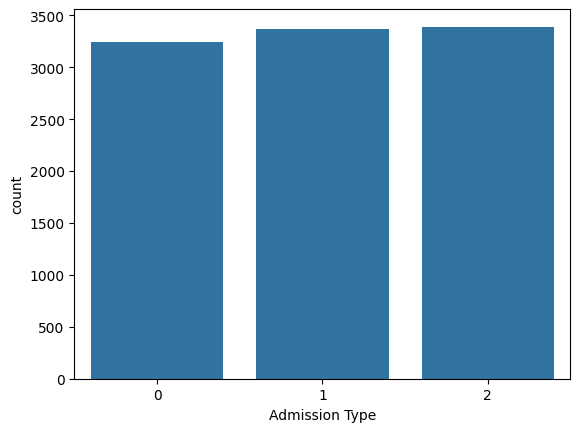

In [10]:
sns.countplot(x='Admission Type', data=df)
plt.show()

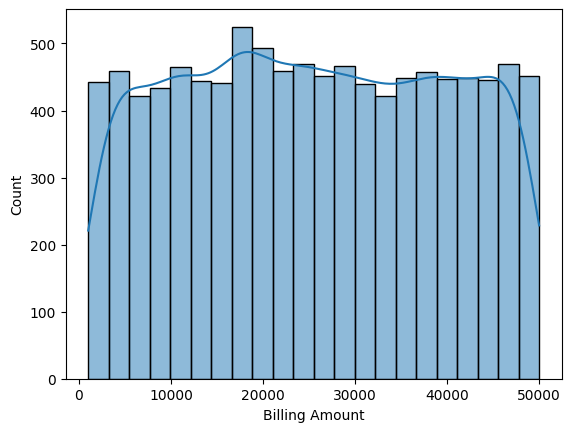

In [11]:
sns.histplot(df['Billing Amount'], kde=True)
plt.show()

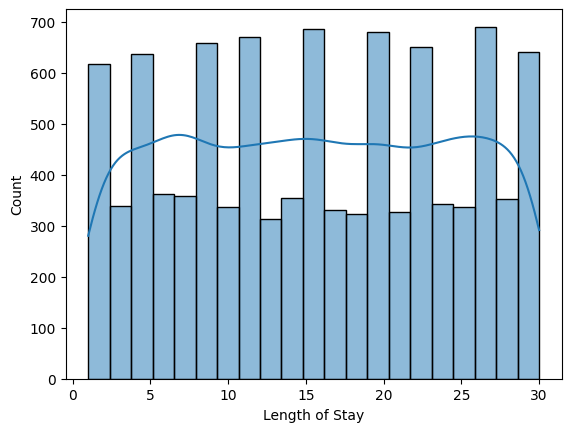

In [12]:
sns.histplot(df['Length of Stay'], kde=True)
plt.show()

# Classification

In [13]:
# Prepare data for classification
X = df.drop(['Name','Date of Admission', 'Discharge Date', 'Admission Type'], axis=1)
y = df['Admission Type']

In [14]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [16]:
y_pred = knn_classifier.predict(X_test)

In [17]:
# Evaluate the classifier
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")

Accuracy: 0.34
Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.43      0.38       660
           1       0.34      0.36      0.35       670
           2       0.34      0.23      0.28       670

    accuracy                           0.34      2000
   macro avg       0.34      0.34      0.33      2000
weighted avg       0.34      0.34      0.33      2000

Confusion Matrix:
[[286 222 152]
 [288 240 142]
 [274 242 154]]


# Regression

In [18]:
X_reg = df.drop(['Name','Date of Admission', 'Discharge Date', 'Billing Amount'], axis=1)
y_reg = df['Billing Amount']

In [19]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

In [20]:
linear_reg = LinearRegression()
linear_reg.fit(X_train_reg, y_train_reg)

LinearRegression()

In [21]:
y_pred_reg = linear_reg.predict(X_test_reg)

In [22]:
print(f"R-squared: {linear_reg.score(X_test_reg, y_test_reg)}")

R-squared: -0.0005334934548739678


In [23]:
models = [LinearRegression(), DecisionTreeRegressor()]
for model in models:
    scores = cross_val_score(model, X_reg, y_reg, cv=5, scoring='r2')
    print(f"{model.__class__.__name__}: R-squared Mean: {scores.mean()}, Standard Deviation: {scores.std()}")

LinearRegression: R-squared Mean: -0.0018754727222702883, Standard Deviation: 0.00188322205048114


DecisionTreeRegressor: R-squared Mean: -1.0330122480767947, Standard Deviation: 0.0672603083948687
